# 1. 인공지능과 가위바위보 하기

## 목차

> <p style="font-size:17px">1-1. 인공지능으로 가위바위보 분류기 만들기</p>
  <p style="font-size:17px">1-2. 데이터를 준비하자!</p> 
  <p style="font-size:17px">1-3. 딥러닝 네트워크 설계하기</p>
  <p style="font-size:17px">1-4. 딥러닝 네트워크 학습시키기</p>
  <p style="font-size:17px">1-5. 얼마나 잘 만들었는지 확인하기</p>
  <p style="font-size:17px">1-6. 결과</p>
  <p style="font-size:17px">1-7. Discussions</p>


## 루브릭 (프로젝트 평가 기준)

> |<p style="font-size:15px"> 평가문항 </p>                |<p style="font-size:15px"> 상세기준 </p>        |
  |--------------------------------------------------------|------------------------------------------------|
  | 1. 이미지 분류기 모델이 성공적으로 만들어 졌는가?      |트레이닝이 정상적으로 수행되었음                |
  | 2. 오버피팅을 극복하기 위한 적절한 시도가 있었는가?    |데이터셋의 다양성, 정규화 등의 시도가 적절하였음|
  | 3. 분류모델의 test accuracy가 기준 이상 높게 나왔는가? |60% 이상 도달하였음                             |

## 1-1. 인공지능으로 가위바위보 분류기 만들기

> 이번 프로젝트에서는 인공지능으로 가위바위보 분류기를 만들어 보려고 합니다. 나중에는 가위바위보를 할 수 있는 인공지능 모델을 만들 수 있기를 기대하면서..... 시작 해보겠습니다! 

## 1-2. 데이터를 준비하자!

> 가위바위보 분류기를 만들기 위해서는, 일단! 가위와 바위와 보의 사진들이 필요합니다. 일단은 각각 100장의 사진을 준비해서 총 300장의 사진을 준비하기로 합니다. 
  사진 데이터는 [Teachable Machine](https://teachablemachine.withgoogle.com/)을 사용해서 수집해보기로 합니다!

**- PIL library**
> * Python Imaging Library로써 파이썬에 이미지 처리에 필요한 기능 및 파일 형식들을 지원합니다. 

**- glob**
> * 특정한 확장자를 가진 파일들의 경로나 이름이 필요할 때, glob 모듈을 사용해서 제시한 확장자에 맞는 파일명들을 리스트 형식으로 받아올 수 있다. (ex. *.jpg, *.txt)

**- numpy**
> 다차원 배열을 처리하는데 필요한 기능들을 제공하고있는 라이브러리 이며, 학습/테스트 이미지 데이터를 배열에 담는데 사용할 수 있습니다.

**- matplot libraray**
> 시각화를 위해서 만들어진 라이브러리이며, 여기서는 resize된 이미지를 출력할 때 사용할 것 입니다.



In [1]:
from PIL import Image
import glob
import os
import numpy as np
import matplotlib.pyplot as plt


print ("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


#### 이미지 사이즈 28x28로 변환하는 함수 만들기

In [2]:
def resize_images(img_path):
    # img_path 안에 있는 .jpg 파일들을 선택해서 images변수안에 저장합니다. 
    images=glob.glob(img_path + "/*.jpg")                      
    
    print(len(images), " images to be resized.")               

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")

### 자신의 가위바위보 이미지 데이터 총 300장으로 학습/테스트 진행
#### **학습 데이터**
> 가위: 80장<br>
> 바위: 80장<br>
> 보  : 80장<br>

#### **테스트 데이터**
> 가위: 20장<br>
> 바위: 20장<br>
> 보  : 20장<br>

#### 가위바위보 학습 이미지 데이터 28x28로 사이즈 변환

In [3]:
# 가위 학습 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/explore1_rock_scissor_paper/only_me/train/scissors"
resize_images(image_dir_path)
print("가위 학습 이미지 resize 완료!")

# 바위 학습 이미지가 저장된 디렉토리 아래의 모든 .jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/explore1_rock_scissor_paper/only_me/train/rock"
resize_images(image_dir_path)
print("바위 학습 이미지 resize 완료!")

#보 학습 이미지가 저장된 디렉토리 아래의 모든 .jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/explore1_rock_scissor_paper/only_me/train/paper"
resize_images(image_dir_path)
print("보 학습 이미지 resize 완료!")

80  images to be resized.
80  images resized.
가위 학습 이미지 resize 완료!
80  images to be resized.
80  images resized.
바위 학습 이미지 resize 완료!
80  images to be resized.
80  images resized.
보 학습 이미지 resize 완료!


#### load_data 함수를 사용하여 학습 데이터 세트 만들기
* x_train에는 학습 이미지 데이터가 포함되어 있습니다. 
* y_train에는 라벨 데이터가 포함되어 있습니다. 
* normalization은 모델이 학습을 진행할 때, 데이터를 정규화 시켜주는게 도움이 되기 때문에 진행합니다. 이미지 데이터는 255개의 픽셀로 이루어져 있기에, 255로 나누어서 0~1 사이의 숫자로 정규화 시켜줍니다.

In [4]:
def load_data(img_path, number_of_data=240):  # 가위바위보 총 학습 데이터 이미지 개수는 240장 입니다.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissors/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

In [5]:
image_dir_path = os.getenv("HOME") + "/aiffel/explore1_rock_scissor_paper/only_me/train"
(x_train_me, y_train_me)=load_data(image_dir_path)
x_train_me_norm = x_train_me/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train_me.shape))
print("y_train shape: {}".format(y_train_me.shape))

학습데이터(x_train)의 이미지 개수는 240 입니다.
x_train shape: (240, 28, 28, 3)
y_train shape: (240,)


#### 0번쩨 학습 이미지와 라벨을 확인

라벨:  0


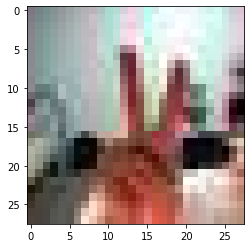

In [6]:
import matplotlib.pyplot as plt

plt.imshow(x_train_me[0])
print('라벨: ', y_train_me[0])

## 1-3. 딥러닝 네트워크 설계하기
> - 학습 이미지에서 128개의 특징을 먼저 확인하고, 이후에 256개의 특징을 확인합니다. 
> - keras.layers.Conv2D: 영상 및 이미지를 처리하는 레이어
> - keras.layers.MaxPool2D/MaxPooling2D: 처리한 이미지에서 주요 값만 뽑아서 처리합니다. 
> - keras.layers.Flatten: 이미지 데이터를 1차원 데이터로 변환

In [7]:
import tensorflow as tf
from tensorflow import keras

# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=128
n_channel_2=256
n_dense=256
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 128)       3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 256)       295168    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 256)         0         
_________________________________________________________________
flatten (Flatten)            (None, 6400)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               1638656   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

## 1-4. 딥러닝 네트워크 학습시키기

In [8]:
# 모델 훈련
model.fit(x_train_me, y_train_me, epochs=n_train_epoch)

Epoch 1/10
8/8 [==============================] - 3s 21ms/step - loss: 103.1294 - accuracy: 0.3250
Epoch 2/10
8/8 [==============================] - 0s 5ms/step - loss: 1.6991 - accuracy: 0.5083
Epoch 3/10
8/8 [==============================] - 0s 5ms/step - loss: 0.3338 - accuracy: 0.8917
Epoch 4/10
8/8 [==============================] - 0s 5ms/step - loss: 0.0876 - accuracy: 0.9708
Epoch 5/10
8/8 [==============================] - 0s 4ms/step - loss: 0.0849 - accuracy: 0.9625
Epoch 6/10
8/8 [==============================] - 0s 4ms/step - loss: 0.0346 - accuracy: 0.9875
Epoch 7/10
8/8 [==============================] - 0s 4ms/step - loss: 0.0322 - accuracy: 0.9917
Epoch 8/10
8/8 [==============================] - 0s 4ms/step - loss: 0.0258 - accuracy: 0.9917
Epoch 9/10
8/8 [==============================] - 0s 4ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 10/10
8/8 [==============================] - 0s 4ms/step - loss: 0.0027 - accuracy: 1.0000


## 1-5. 얼마나 잘 만들었는지 확인하기

#### 가위바위보 테스트 이미지 데이터 28x28로 사이즈 변환

In [9]:
# 가위 테스트 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/explore1_rock_scissor_paper/only_me/test/scissors"
resize_images(image_dir_path)
print("가위 테스트 이미지 resize 완료!")

# 바위 테스트 이미지가 저장된 디렉토리 아래의 모든 .jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/explore1_rock_scissor_paper/only_me/test/rock"
resize_images(image_dir_path)
print("바위 테스트 이미지 resize 완료!")

#보 테스트 이미지가 저장된 디렉토리 아래의 모든 .jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/explore1_rock_scissor_paper/only_me/test/paper"
resize_images(image_dir_path)
print("보 테스트 이미지 resize 완료!")

20  images to be resized.
20  images resized.
가위 테스트 이미지 resize 완료!
20  images to be resized.
20  images resized.
바위 테스트 이미지 resize 완료!
20  images to be resized.
20  images resized.
보 테스트 이미지 resize 완료!


In [10]:
def test_data(img_path, number_of_data=60):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissors/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("테스트데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/explore1_rock_scissor_paper/only_me/test"
(x_test_me, y_test_me)=test_data(image_dir_path)
x_test_me_norm = x_test_me/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test_me.shape))
print("y_test shape: {}".format(y_test_me.shape))

테스트데이터(x_train)의 이미지 개수는 60 입니다.
x_test shape: (60, 28, 28, 3)
y_test shape: (60,)


In [11]:
# 모델 시험
test_me_loss, test_me_accuracy = model.evaluate(x_test_me, y_test_me, verbose=2)
print("test_loss: {} ".format(test_me_loss))
print("test_accuracy: {}".format(test_me_accuracy))

2/2 - 0s - loss: 8.5559e-04 - accuracy: 1.0000
test_loss: 0.00085559202125296 
test_accuracy: 1.0


* 학습 accuracy: 1.0 / 테스트 accuracy: 1.0
* 적은 양의 이미지 데이터를 학습한 후, 테스트를 했음에도 불구하고 너무 높은 학습 정확도와 테스트 정확도가 나와서 의심을 갖고 다시한번 생각해 보는 시간을 갖게 되었습니다. 
* 확인해본 결과, 마치 정답을 알려주고 학습한 것이나 다름 없다는 것을 알게 되었습니다. 제 손 이미지 데이터로 학습을하고, 제 손 이미지 데이터로 테스트를 했으니 높을 결과가 나올 수 밖에 없었습니다.
* 따라서 학습 이미지 데이터 양을 다른 사람들의 이미지 데이터로 늘리고, 테스트는 제 손 이미지 데이터로만 진행을 했습니다. 

### 가위바위보 이미지 데이터 총 360장으로 학습/테스트 진행
#### **학습 데이터 (다른 사람 이미지)**
> 가위: 100장<br>
> 바위: 100장<br>
> 보  : 100장<br>

#### **테스트 데이터 (내 이미지)**
> 가위: 20장<br>
> 바위: 20장<br>
> 보  : 20장<br>

#### 가위바위보 학습 이미지 데이터 28x28로 사이즈 변환

In [12]:
# 가위 학습 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/explore1_rock_scissor_paper/300_data/train/scissors"
resize_images(image_dir_path)
print("가위 학습 이미지 resize 완료!")

# 바위 학습 이미지가 저장된 디렉토리 아래의 모든 .jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/explore1_rock_scissor_paper/300_data/train/rock"
resize_images(image_dir_path)
print("바위 학습 이미지 resize 완료!")

#보 학습 이미지가 저장된 디렉토리 아래의 모든 .jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/explore1_rock_scissor_paper/300_data/train/paper"
resize_images(image_dir_path)
print("보 학습 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 학습 이미지 resize 완료!
100  images to be resized.
100  images resized.
바위 학습 이미지 resize 완료!
100  images to be resized.
100  images resized.
보 학습 이미지 resize 완료!


In [13]:
def load_data(img_path, number_of_data=300):  # 가위바위보 총 학습 데이터 이미지 개수는 240장 입니다.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissors/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

In [14]:
image_dir_path = os.getenv("HOME") + "/aiffel/explore1_rock_scissor_paper/300_data/train"
(x_train_300, y_train_300)=load_data(image_dir_path)
x_train_300_norm = x_train_300/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train_300.shape))
print("y_train shape: {}".format(y_train_300.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


#### 0번쩨 학습 이미지와 라벨을 확인

라벨:  0


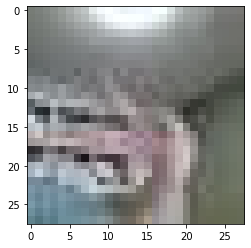

In [15]:
import matplotlib.pyplot as plt

plt.imshow(x_train_300[0])
print('라벨: ', y_train_300[0])

In [16]:
import tensorflow as tf
from tensorflow import keras

# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=128
n_channel_2=256
n_dense=256
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 128)       3584      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 256)       295168    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 256)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               1638656   
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [17]:
# 모델 훈련
model.fit(x_train_300, y_train_300, epochs=n_train_epoch)

Epoch 1/10
10/10 [==============================] - 0s 12ms/step - loss: 64.5575 - accuracy: 0.3033
Epoch 2/10
10/10 [==============================] - 0s 4ms/step - loss: 1.7747 - accuracy: 0.3300
Epoch 3/10
10/10 [==============================] - 0s 4ms/step - loss: 1.1715 - accuracy: 0.4200
Epoch 4/10
10/10 [==============================] - 0s 4ms/step - loss: 0.8755 - accuracy: 0.6533
Epoch 5/10
10/10 [==============================] - 0s 4ms/step - loss: 0.7104 - accuracy: 0.6900
Epoch 6/10
10/10 [==============================] - 0s 4ms/step - loss: 0.5452 - accuracy: 0.7933
Epoch 7/10
10/10 [==============================] - 0s 4ms/step - loss: 0.3728 - accuracy: 0.8967
Epoch 8/10
10/10 [==============================] - 0s 4ms/step - loss: 0.2383 - accuracy: 0.9233
Epoch 9/10
10/10 [==============================] - 0s 4ms/step - loss: 0.1570 - accuracy: 0.9667
Epoch 10/10
10/10 [==============================] - 0s 4ms/step - loss: 0.1206 - accuracy: 0.9733


In [18]:
# 가위 테스트 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/explore1_rock_scissor_paper/300_data/test/scissors"
resize_images(image_dir_path)
print("가위 테스트 이미지 resize 완료!")

# 바위 테스트 이미지가 저장된 디렉토리 아래의 모든 .jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/explore1_rock_scissor_paper/300_data/test/rock"
resize_images(image_dir_path)
print("바위 테스트 이미지 resize 완료!")

#보 테스트 이미지가 저장된 디렉토리 아래의 모든 .jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/explore1_rock_scissor_paper/300_data/test/paper"
resize_images(image_dir_path)
print("보 테스트 이미지 resize 완료!")

20  images to be resized.
20  images resized.
가위 테스트 이미지 resize 완료!
20  images to be resized.
20  images resized.
바위 테스트 이미지 resize 완료!
20  images to be resized.
20  images resized.
보 테스트 이미지 resize 완료!


In [19]:
def test_data(img_path, number_of_data=60):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissors/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("테스트데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

In [20]:
image_dir_path = os.getenv("HOME") + "/aiffel/explore1_rock_scissor_paper/300_data/test"
(x_test_300, y_test_300)=test_data(image_dir_path)
x_test_300_norm = x_test_300/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test_300.shape))
print("y_test shape: {}".format(y_test_300.shape))

테스트데이터(x_train)의 이미지 개수는 60 입니다.
x_test shape: (60, 28, 28, 3)
y_test shape: (60,)


In [21]:
# 모델 시험
test_300_loss, test_300_accuracy = model.evaluate(x_test_300, y_test_300, verbose=2)
print("test_loss: {} ".format(test_300_loss))
print("test_accuracy: {}".format(test_300_accuracy))

2/2 - 0s - loss: 2.9076 - accuracy: 0.4167
test_loss: 2.907611131668091 
test_accuracy: 0.4166666567325592


* 학습 accuracy: 0.98 / 테스트 accuracy: 0.33
* 이제는 뭔가 제대로 된 학습과 테스트를 한 결과 같습니다. 
* 300장의 이미지를 학습하고 나온 테스트 정확도이니, 학습 이미지 양을 더 늘리도록 하겠습니다. 

### 가위바위보 이미지 데이터 총 1080장으로 학습/테스트 진행
#### **학습 데이터 (다른 사람 이미지)**
> 가위: 300장<br>
> 바위: 300장<br>
> 보  : 300장<br>

#### **테스트 데이터 (내 이미지)**
> 가위: 60장<br>
> 바위: 60장<br>
> 보  : 60장<br>

In [22]:
# 가위 학습 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/explore1_rock_scissor_paper/900_data/train/scissors"
resize_images(image_dir_path)
print("가위 학습 이미지 resize 완료!")

# 바위 학습 이미지가 저장된 디렉토리 아래의 모든 .jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/explore1_rock_scissor_paper/900_data/train/rock"
resize_images(image_dir_path)
print("바위 학습 이미지 resize 완료!")

#보 학습 이미지가 저장된 디렉토리 아래의 모든 .jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/explore1_rock_scissor_paper/900_data/train/paper"
resize_images(image_dir_path)
print("보 학습 이미지 resize 완료!")

300  images to be resized.
300  images resized.
가위 학습 이미지 resize 완료!
300  images to be resized.
300  images resized.
바위 학습 이미지 resize 완료!
300  images to be resized.
300  images resized.
보 학습 이미지 resize 완료!


In [23]:
def load_data(img_path, number_of_data=900):  # 가위바위보 총 학습 데이터 이미지 개수는 900장 입니다.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissors/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

In [24]:
image_dir_path = os.getenv("HOME") + "/aiffel/explore1_rock_scissor_paper/900_data/train"
(x_train_900, y_train_900)=load_data(image_dir_path)
x_train_900_norm = x_train_900/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train_900.shape))
print("y_train shape: {}".format(y_train_900.shape))

학습데이터(x_train)의 이미지 개수는 900 입니다.
x_train shape: (900, 28, 28, 3)
y_train shape: (900,)


라벨:  0


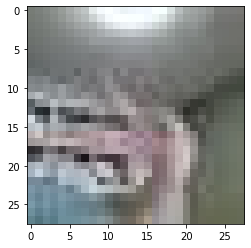

In [25]:
import matplotlib.pyplot as plt

plt.imshow(x_train_900[0])
print('라벨: ', y_train_900[0])

In [26]:
import tensorflow as tf
from tensorflow import keras

# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=128
n_channel_2=256
n_dense=256
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 128)       3584      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 256)       295168    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 256)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               1638656   
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [27]:
# 모델 훈련
model.fit(x_train_900, y_train_900, epochs=n_train_epoch)

Epoch 1/10
29/29 [==============================] - 0s 6ms/step - loss: 14.1475 - accuracy: 0.4022
Epoch 2/10
29/29 [==============================] - 0s 4ms/step - loss: 0.7426 - accuracy: 0.6889
Epoch 3/10
29/29 [==============================] - 0s 4ms/step - loss: 0.3687 - accuracy: 0.8744
Epoch 4/10
29/29 [==============================] - 0s 4ms/step - loss: 0.1768 - accuracy: 0.9489
Epoch 5/10
29/29 [==============================] - 0s 4ms/step - loss: 0.1122 - accuracy: 0.9667
Epoch 6/10
29/29 [==============================] - 0s 4ms/step - loss: 0.0491 - accuracy: 0.9878
Epoch 7/10
29/29 [==============================] - 0s 4ms/step - loss: 0.0198 - accuracy: 0.9967
Epoch 8/10
29/29 [==============================] - 0s 4ms/step - loss: 0.0435 - accuracy: 0.9878
Epoch 9/10
29/29 [==============================] - 0s 4ms/step - loss: 0.0230 - accuracy: 0.9956
Epoch 10/10
29/29 [==============================] - 0s 4ms/step - loss: 0.0061 - accuracy: 1.0000


In [28]:
# 가위 테스트 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/explore1_rock_scissor_paper/900_data/test/scissors"
resize_images(image_dir_path)
print("가위 테스트 이미지 resize 완료!")

# 바위 테스트 이미지가 저장된 디렉토리 아래의 모든 .jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/explore1_rock_scissor_paper/900_data/test/rock"
resize_images(image_dir_path)
print("바위 테스트 이미지 resize 완료!")

#보 테스트 이미지가 저장된 디렉토리 아래의 모든 .jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/explore1_rock_scissor_paper/900_data/test/paper"
resize_images(image_dir_path)
print("보 테스트 이미지 resize 완료!")

60  images to be resized.
60  images resized.
가위 테스트 이미지 resize 완료!
60  images to be resized.
60  images resized.
바위 테스트 이미지 resize 완료!
60  images to be resized.
60  images resized.
보 테스트 이미지 resize 완료!


In [29]:
def test_data(img_path, number_of_data=180):  
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissors/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("테스트데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

In [30]:
image_dir_path = os.getenv("HOME") + "/aiffel/explore1_rock_scissor_paper/900_data/test"
(x_test_900, y_test_900)=test_data(image_dir_path)
x_test_900_norm = x_test_900/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test_900.shape))
print("y_test shape: {}".format(y_test_900.shape))

테스트데이터(x_train)의 이미지 개수는 180 입니다.
x_test shape: (180, 28, 28, 3)
y_test shape: (180,)


In [31]:
# 모델 시험
test_900_loss, test_900_accuracy = model.evaluate(x_test_900, y_test_900, verbose=2)
print("test_loss: {} ".format(test_900_loss))
print("test_accuracy: {}".format(test_900_accuracy))

6/6 - 0s - loss: 5.4720 - accuracy: 0.5611
test_loss: 5.471998691558838 
test_accuracy: 0.5611110925674438


* 학습 accuracy: 0.98 / 테스트 accuracy: 0.57
* 학습 정확도는 많이 달라지는 것 같지는 않지만, 테스트 정확도는 눈에 띄게 증가한 것을 확인 할 수 있습니다. 
* 테스트 정확도를 더 올리기 위해서 더 많은 양의 이미지로 학습하고 테스트를 진행 해복겠습니다.

### 가위바위보 이미지 데이터 총 2160장으로 학습/테스트 진행
#### **학습 데이터 (다른 사람 이미지)**
> 가위: 600장<br>
> 바위: 600장<br>
> 보  : 600장<br>

#### **테스트 데이터 (내 이미지)**
> 가위: 120장<br>
> 바위: 120장<br>
> 보  : 120장<br>

In [32]:
# 가위 학습 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/explore1_rock_scissor_paper/1800_data/train/scissors"
resize_images(image_dir_path)
print("가위 학습 이미지 resize 완료!")

# 바위 학습 이미지가 저장된 디렉토리 아래의 모든 .jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/explore1_rock_scissor_paper/1800_data/train/rock"
resize_images(image_dir_path)
print("바위 학습 이미지 resize 완료!")

#보 학습 이미지가 저장된 디렉토리 아래의 모든 .jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/explore1_rock_scissor_paper/1800_data/train/paper"
resize_images(image_dir_path)
print("보 학습 이미지 resize 완료!")

600  images to be resized.
600  images resized.
가위 학습 이미지 resize 완료!
600  images to be resized.
600  images resized.
바위 학습 이미지 resize 완료!
600  images to be resized.
600  images resized.
보 학습 이미지 resize 완료!


In [33]:
def load_data(img_path, number_of_data=1800):  # 가위바위보 총 학습 데이터 이미지 개수는 1800장 입니다.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissors/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

In [34]:
image_dir_path = os.getenv("HOME") + "/aiffel/explore1_rock_scissor_paper/1800_data/train"
(x_train_1800, y_train_1800)=load_data(image_dir_path)
x_train_1800_norm = x_train_1800/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train_1800.shape))
print("y_train shape: {}".format(y_train_1800.shape))

학습데이터(x_train)의 이미지 개수는 1800 입니다.
x_train shape: (1800, 28, 28, 3)
y_train shape: (1800,)


라벨:  0


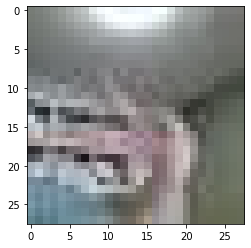

In [35]:
import matplotlib.pyplot as plt

plt.imshow(x_train_1800[0])
print('라벨: ', y_train_1800[0])

In [36]:
import tensorflow as tf
from tensorflow import keras

# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=128
n_channel_2=256
n_dense=256
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 128)       3584      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 256)       295168    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 256)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               1638656   
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

In [37]:
# 모델 훈련
model.fit(x_train_1800, y_train_1800, epochs=n_train_epoch)

Epoch 1/10
57/57 [==============================] - 1s 7ms/step - loss: 10.3149 - accuracy: 0.5200
Epoch 2/10
57/57 [==============================] - 0s 4ms/step - loss: 0.3167 - accuracy: 0.8833
Epoch 3/10
57/57 [==============================] - 0s 4ms/step - loss: 0.1717 - accuracy: 0.9394
Epoch 4/10
57/57 [==============================] - 0s 4ms/step - loss: 0.0839 - accuracy: 0.9744
Epoch 5/10
57/57 [==============================] - 0s 4ms/step - loss: 0.0437 - accuracy: 0.9889
Epoch 6/10
57/57 [==============================] - 0s 4ms/step - loss: 0.0109 - accuracy: 0.9983
Epoch 7/10
57/57 [==============================] - 0s 4ms/step - loss: 0.0043 - accuracy: 1.0000
Epoch 8/10
57/57 [==============================] - 0s 4ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 9/10
57/57 [==============================] - 0s 4ms/step - loss: 8.8872e-04 - accuracy: 1.0000
Epoch 10/10
57/57 [==============================] - 0s 4ms/step - loss: 0.0013 - accuracy: 1.0000


In [38]:
# 가위 테스트 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/explore1_rock_scissor_paper/1800_data/test/scissors"
resize_images(image_dir_path)
print("가위 테스트 이미지 resize 완료!")

# 바위 테스트 이미지가 저장된 디렉토리 아래의 모든 .jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/explore1_rock_scissor_paper/1800_data/test/rock"
resize_images(image_dir_path)
print("바위 테스트 이미지 resize 완료!")

#보 테스트 이미지가 저장된 디렉토리 아래의 모든 .jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/explore1_rock_scissor_paper/1800_data/test/paper"
resize_images(image_dir_path)
print("보 테스트 이미지 resize 완료!")

120  images to be resized.
120  images resized.
가위 테스트 이미지 resize 완료!
120  images to be resized.
120  images resized.
바위 테스트 이미지 resize 완료!
120  images to be resized.
120  images resized.
보 테스트 이미지 resize 완료!


In [39]:
def test_data(img_path, number_of_data=360):  
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissors/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("테스트데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

In [40]:
image_dir_path = os.getenv("HOME") + "/aiffel/explore1_rock_scissor_paper/1800_data/test"
(x_test_1800, y_test_1800)=test_data(image_dir_path)
x_test_1800_norm = x_test_1800/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test_1800.shape))
print("y_test shape: {}".format(y_test_1800.shape))

테스트데이터(x_train)의 이미지 개수는 360 입니다.
x_test shape: (360, 28, 28, 3)
y_test shape: (360,)


In [41]:
# 모델 시험
test_1800_loss, test_1800_accuracy = model.evaluate(x_test_1800, y_test_1800, verbose=2)
print("test_loss: {} ".format(test_1800_loss))
print("test_accuracy: {}".format(test_1800_accuracy))

12/12 - 0s - loss: 4.3792 - accuracy: 0.7583
test_loss: 4.379213333129883 
test_accuracy: 0.7583333253860474


* 학습 accuracy: 1.0 / 테스트 accuracy: 0.76
* 테스트 정확도는 76%를 넘겼지만, 더 확실히 높을 정확도를 얻기 위해서 갖고있는 모든 이미지를 사용 해보겠습니다. 

### 가위바위보 이미지 데이터 총 4836장으로 학습/테스트 진행
#### **학습 데이터 (다른 사람 이미지)**
> 가위: 1346장<br>
> 바위: 1346장<br>
> 보  : 1346장<br>

#### **테스트 데이터 (내 이미지)**
> 가위: 266장<br>
> 바위: 266장<br>
> 보  : 266장<br>

In [42]:
# 가위 학습 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/explore1_rock_scissor_paper/all_data/train/scissors"
resize_images(image_dir_path)
print("가위 학습 이미지 resize 완료!")

# 바위 학습 이미지가 저장된 디렉토리 아래의 모든 .jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/explore1_rock_scissor_paper/all_data/train/rock"
resize_images(image_dir_path)
print("바위 학습 이미지 resize 완료!")

#보 학습 이미지가 저장된 디렉토리 아래의 모든 .jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/explore1_rock_scissor_paper/all_data/train/paper"
resize_images(image_dir_path)
print("보 학습 이미지 resize 완료!")

1346  images to be resized.
1346  images resized.
가위 학습 이미지 resize 완료!
1346  images to be resized.
1346  images resized.
바위 학습 이미지 resize 완료!
1346  images to be resized.
1346  images resized.
보 학습 이미지 resize 완료!


In [43]:
def load_data(img_path, number_of_data=4038):  # 가위바위보 총 학습 데이터 이미지 개수는 4038장 입니다.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissors/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

In [44]:
image_dir_path = os.getenv("HOME") + "/aiffel/explore1_rock_scissor_paper/all_data/train"
(x_train_all, y_train_all)=load_data(image_dir_path)
x_train_all_norm = x_train_all/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train_all.shape))
print("y_train shape: {}".format(y_train_all.shape))

학습데이터(x_train)의 이미지 개수는 4038 입니다.
x_train shape: (4038, 28, 28, 3)
y_train shape: (4038,)


라벨:  0


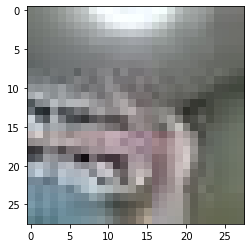

In [45]:
import matplotlib.pyplot as plt

plt.imshow(x_train_all[0])
print('라벨: ', y_train_all[0])

In [46]:
import tensorflow as tf
from tensorflow import keras

# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=128
n_channel_2=256
n_dense=256
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 128)       3584      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 256)       295168    
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 256)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               1638656   
_________________________________________________________________
dense_9 (Dense)              (None, 10)               

In [47]:
# 모델 훈련
model.fit(x_train_all, y_train_all, epochs=n_train_epoch)

Epoch 1/10
127/127 [==============================] - 1s 5ms/step - loss: 4.9393 - accuracy: 0.5362
Epoch 2/10
127/127 [==============================] - 1s 4ms/step - loss: 0.4881 - accuracy: 0.8143
Epoch 3/10
127/127 [==============================] - 0s 4ms/step - loss: 0.2665 - accuracy: 0.9089
Epoch 4/10
127/127 [==============================] - 1s 4ms/step - loss: 0.1454 - accuracy: 0.9525
Epoch 5/10
127/127 [==============================] - 0s 4ms/step - loss: 0.1182 - accuracy: 0.9611
Epoch 6/10
127/127 [==============================] - 1s 4ms/step - loss: 0.0982 - accuracy: 0.9663
Epoch 7/10
127/127 [==============================] - 1s 4ms/step - loss: 0.0760 - accuracy: 0.9762
Epoch 8/10
127/127 [==============================] - 1s 4ms/step - loss: 0.2890 - accuracy: 0.9064
Epoch 9/10
127/127 [==============================] - 1s 4ms/step - loss: 0.0581 - accuracy: 0.9822
Epoch 10/10
127/127 [==============================] - 1s 4ms/step - loss: 0.0536 - accuracy: 0.9827

In [48]:
# 가위 테스트 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/explore1_rock_scissor_paper/all_data/test/scissors"
resize_images(image_dir_path)
print("가위 테스트 이미지 resize 완료!")

# 바위 테스트 이미지가 저장된 디렉토리 아래의 모든 .jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/explore1_rock_scissor_paper/all_data/test/rock"
resize_images(image_dir_path)
print("바위 테스트 이미지 resize 완료!")

#보 테스트 이미지가 저장된 디렉토리 아래의 모든 .jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/explore1_rock_scissor_paper/all_data/test/paper"
resize_images(image_dir_path)
print("보 테스트 이미지 resize 완료!")

266  images to be resized.
266  images resized.
가위 테스트 이미지 resize 완료!
266  images to be resized.
266  images resized.
바위 테스트 이미지 resize 완료!
266  images to be resized.
266  images resized.
보 테스트 이미지 resize 완료!


In [49]:
def test_data(img_path, number_of_data=798): 
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissors/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("테스트데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

In [50]:
image_dir_path = os.getenv("HOME") + "/aiffel/explore1_rock_scissor_paper/all_data/test"
(x_test_all, y_test_all)=test_data(image_dir_path)
x_test_all_norm = x_test_all/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test_all.shape))
print("y_test shape: {}".format(y_test_all.shape))

테스트데이터(x_train)의 이미지 개수는 798 입니다.
x_test shape: (798, 28, 28, 3)
y_test shape: (798,)


In [51]:
# 모델 시험
test_all_loss, test_all_accuracy = model.evaluate(x_test_all, y_test_all, verbose=2)
print("test_loss: {} ".format(test_all_loss))
print("test_accuracy: {}".format(test_all_accuracy))

25/25 - 0s - loss: 2.8976 - accuracy: 0.7068
test_loss: 2.897581100463867 
test_accuracy: 0.7067669034004211


* 학습 accuracy: 0.98 / 테스트 accuracy: 0.71
* 학습 이미지 데이터를 4,038장 사용하고, 테스트 이미지 데이터를 798장 사용해서 테스트 정확도를 0.77%까지 얻을 수 있었습니다. 

## 1-6. 결과

| 학습 데이터 수   | 테스트 데이터 수 | 학습 정확도 | 테스트 정확도 |       비고       |
|------------------|------------------|-------------|---------------|------------------|
|       240        |        60        |     1.0     |      1.0      | 학습/테스트 데이터 오류 |
|       300        |        60        |     0.97    |     0.42      |        N/A       |
|       900        |       180        |     1.0     |     0.56      |        N/A       |
|     1,800        |       360        |     1.0     |     0.76      |        N/A       |
|     4,038        |       798        |     0.98    |     0.71      |        N/A       |

* 제 자신의 이미지로 학습하고 테스트까지 진행하여서 학습/테스트 정확도가 100%가 나오는 에러가 발생하였습니다.
* 다른 사람의 이미지 300장으로 학습하고 제 이미지 60장으로 테스트를 진행하였을 때, 97%의 학습 정확도와 42%의 테스트 정확도가 나왔습니다.
* 다른 사람의 이미지 900장으로 학습하고 제 이미지 180장으로 테스트를 진행하였을 때, 100%의 학습 정확도와 56%의 테스트 정확도가 나왔습니다.
* 다른 사람의 이미지 1,800장으로 학습하고 제 이미지 360장으로 테스트를 진행하였을 때, 100%의 학습 정확도와 76%의 테스트 정확도가 나왔습니다.
* 다른 사람의 이미지 4,038장으로 학습하고 제 이미지 798장으로 테스트를 진행하였을 때, 98%의 학습 정확도와 71%의 테스트 정확도가 나왔습니다.

## 1-7. Discussions
* 첫번째 제 자산의 이미지 만으로 학습하고 테스트 한 결과를 제외한다면, 1,800장의 학습 데이터를 사용할 때 까지는 테스트 정확도가 76%까지 증가하였습니다. 
    * 학습 데이터를 4,038장까지 늘렸지만 테스트 정확도는 71%로 오히려 5% 가량이 감소한 결과를 확인할 수 있습니다.
* 이는 증가시킨 약 2,000장의 학습 이미지 데이터의 quality가 좋지 않았다면 설명이 가능한 결과입니다.
* 이번 가위바위보 exploration 프로젝트를 진행하면서 데이터 수를 증가 시키면서 overfitting을 방지할 수 있었다고 생각하지만, 동시에 quality가 좋지 않은 이미지를 학습 데이터로 사용할 확률도 높아졌다고 생각합니다. 
* 따라서 이번 exploration을 진행하면서 가위바위도 이미지 데이터를 확인하고 정제하는 작업에 공을 들였습니다. 아래의 이미지들 같이 확실한 가위 또는 바위 또는 보로 보이지 않는 이미지들과 보편적으로 사용하지 않는 가위 이미지 데이터들을 정제하게 되었습니다.

* 데이터의 Quantity 보다는 Quality가 정확도를 증가시키는 중요한 점이라는 것을 알게 되었고, 데이터 정제의 중요성을 다시한번 깨닳게 되었습니다. 

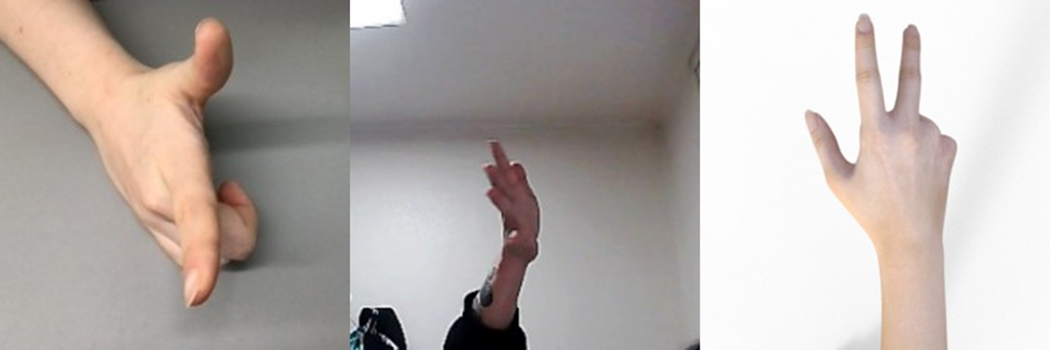

## References
- [Python Imaging Library (PIL)](https://pypi.org/project/Pillow/)
- [glob](https://docs.python.org/ko/3/library/glob.html)
- [numpy](http://pythonstudy.xyz/python/article/402-numpy-%EC%82%AC%EC%9A%A9%ED%95%98%EA%B8%B0)
- [matplot library(matplot.lib)](https://matplotlib.org/)